# 混合ガウスモデルによるクラスタリング

[GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)

In [80]:
# モジュールのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import mixture
from matplotlib.colors import LogNorm

In [81]:
# Colaboratoryでは以下を実行して必要なファイルをダウンロード
!wget https://raw.githubusercontent.com/UTDataMining/2020A/master/ex6/weather.xlsx

/bin/sh: wget: command not found


In [82]:
weather_df = pd.read_excel('weather.xlsx', header=4, usecols=[0,2,3],  skiprows=[5], skipfooter=4, names=['Pref','Temp','Rain']) 
X = weather_df[['Temp', 'Rain']].values 
X = (X-X.mean(axis=0))/X.std(axis=0) 

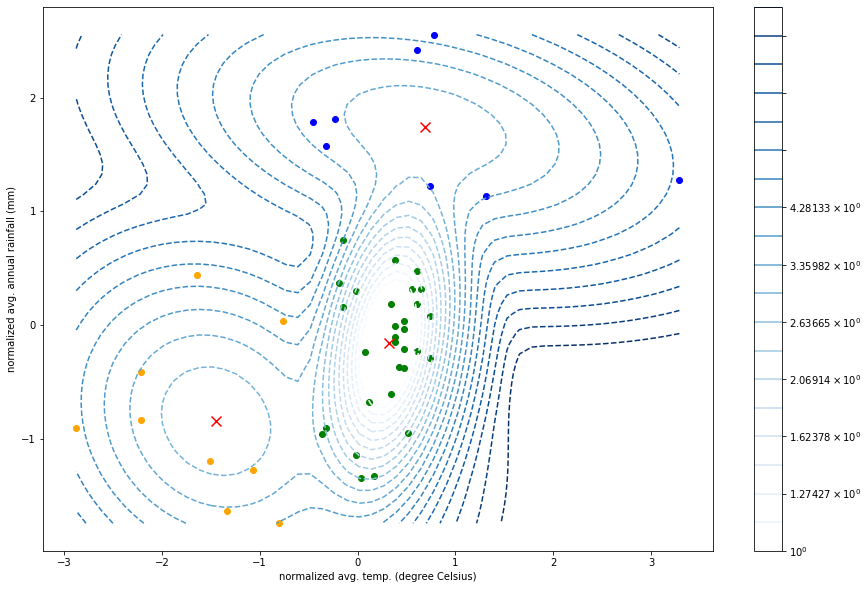

In [88]:
clf = mixture.GaussianMixture(n_components=3, random_state=0)
clf.fit(X)
clusters = clf.predict(X) # クラスタラベル
centers = clf.means_ # クラスタ中心
#print(clf.predict_proba(X)) # 事後確率
#print(clf.weights_) # 各混合要素の重み

x, y = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max()), np.linspace(X[:,1].min(), X[:,1].max()))
Z = -clf.score_samples(np.array([x.ravel(), y.ravel()]).T)
Z = Z.reshape(x.shape)

plt.figure(figsize=(15,10))

CS = plt.contour(x, y, Z, norm=LogNorm(vmin=1.0, vmax=10.0), levels=np.logspace(0, 1, 20), linestyles='dashed', cmap='Blues')
plt.colorbar(CS)

plt.xlabel('normalized avg. temp. (degree Celsius)')
plt.ylabel('normalized avg. annual rainfall (mm)')
plt.scatter(X[clusters==0,0],X[clusters==0,1],c='blue')
plt.scatter(X[clusters==1,0],X[clusters==1,1],c='green')
plt.scatter(X[clusters==2,0],X[clusters==2,1],c='orange')
plt.scatter(centers[:,0], centers[:,1], c='red', s=100, marker='x'); 